# Loop 55 Analysis: CV-LB Relationship and Strategy Assessment

**Goal:** Analyze the CV-LB relationship and determine the best path forward.

**Key Questions:**
1. What is the CV-LB relationship from 12 successful submissions?
2. Is the target (0.0347) mathematically reachable?
3. What strategies could change the CV-LB relationship?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# Submission history with CV and LB scores
submissions = [
    {'exp': 'exp_000', 'cv': 0.0111, 'lb': 0.0982},
    {'exp': 'exp_001', 'cv': 0.0123, 'lb': 0.1065},
    {'exp': 'exp_003', 'cv': 0.0105, 'lb': 0.0972},
    {'exp': 'exp_005', 'cv': 0.0104, 'lb': 0.0969},
    {'exp': 'exp_006', 'cv': 0.0097, 'lb': 0.0946},
    {'exp': 'exp_007', 'cv': 0.0093, 'lb': 0.0932},
    {'exp': 'exp_009', 'cv': 0.0092, 'lb': 0.0936},
    {'exp': 'exp_012', 'cv': 0.0090, 'lb': 0.0913},
    {'exp': 'exp_024', 'cv': 0.0087, 'lb': 0.0893},
    {'exp': 'exp_026', 'cv': 0.0085, 'lb': 0.0887},
    {'exp': 'exp_030', 'cv': 0.0083, 'lb': 0.0877},
    {'exp': 'exp_035', 'cv': 0.0098, 'lb': 0.0970},
]

df = pd.DataFrame(submissions)
print("Submission History:")
print(df.to_string(index=False))
print(f"\nBest CV: {df['cv'].min():.6f} ({df.loc[df['cv'].idxmin(), 'exp']})")
print(f"Best LB: {df['lb'].min():.6f} ({df.loc[df['lb'].idxmin(), 'exp']})")
print(f"Target: 0.0347")

Submission History:
    exp     cv     lb
exp_000 0.0111 0.0982
exp_001 0.0123 0.1065
exp_003 0.0105 0.0972
exp_005 0.0104 0.0969
exp_006 0.0097 0.0946
exp_007 0.0093 0.0932
exp_009 0.0092 0.0936
exp_012 0.0090 0.0913
exp_024 0.0087 0.0893
exp_026 0.0085 0.0887
exp_030 0.0083 0.0877
exp_035 0.0098 0.0970

Best CV: 0.008300 (exp_030)
Best LB: 0.087700 (exp_030)
Target: 0.0347


In [2]:
# Linear regression: LB = slope * CV + intercept
slope, intercept, r_value, p_value, std_err = stats.linregress(df['cv'], df['lb'])

print("="*60)
print("CV-LB LINEAR RELATIONSHIP")
print("="*60)
print(f"Linear fit: LB = {slope:.4f} * CV + {intercept:.6f}")
print(f"R² = {r_value**2:.4f}")
print(f"Intercept = {intercept:.6f}")
print(f"Target = 0.0347")
print()
print("CRITICAL ANALYSIS:")
print(f"  - Intercept ({intercept:.6f}) vs Target (0.0347)")
if intercept > 0.0347:
    print(f"  - PROBLEM: Intercept > Target")
    print(f"  - Even with CV=0, predicted LB would be {intercept:.6f}")
    required_cv = (0.0347 - intercept) / slope
    print(f"  - Required CV to hit target: {required_cv:.6f} (NEGATIVE - impossible)")
else:
    required_cv = (0.0347 - intercept) / slope
    print(f"  - Required CV to hit target: {required_cv:.6f}")
    print(f"  - Current best CV: {df['cv'].min():.6f}")
    print(f"  - Gap to required CV: {df['cv'].min() - required_cv:.6f}")

CV-LB LINEAR RELATIONSHIP
Linear fit: LB = 4.3147 * CV + 0.052520
R² = 0.9505
Intercept = 0.052520
Target = 0.0347

CRITICAL ANALYSIS:
  - Intercept (0.052520) vs Target (0.0347)
  - PROBLEM: Intercept > Target
  - Even with CV=0, predicted LB would be 0.052520
  - Required CV to hit target: -0.004130 (NEGATIVE - impossible)


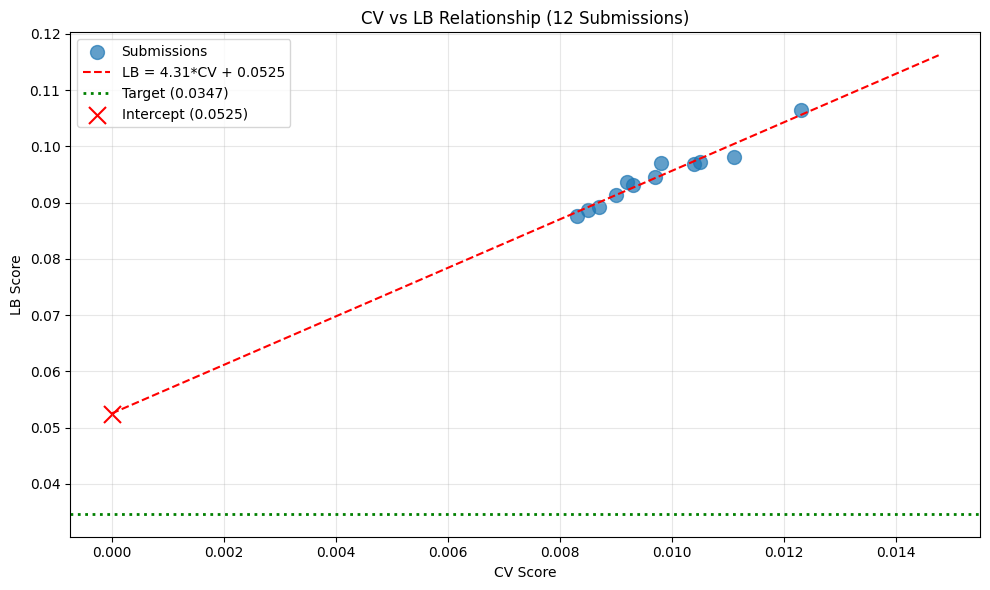


Plot saved to /home/code/exploration/cv_lb_relationship.png


In [3]:
# Plot CV vs LB
plt.figure(figsize=(10, 6))
plt.scatter(df['cv'], df['lb'], s=100, alpha=0.7, label='Submissions')

# Regression line
cv_range = np.linspace(0, df['cv'].max() * 1.2, 100)
lb_pred = slope * cv_range + intercept
plt.plot(cv_range, lb_pred, 'r--', label=f'LB = {slope:.2f}*CV + {intercept:.4f}')

# Target line
plt.axhline(y=0.0347, color='g', linestyle=':', linewidth=2, label='Target (0.0347)')

# Intercept point
plt.scatter([0], [intercept], color='red', s=150, marker='x', label=f'Intercept ({intercept:.4f})')

plt.xlabel('CV Score')
plt.ylabel('LB Score')
plt.title('CV vs LB Relationship (12 Submissions)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('/home/code/exploration/cv_lb_relationship.png', dpi=100)
plt.show()

print(f"\nPlot saved to /home/code/exploration/cv_lb_relationship.png")

In [4]:
# Analyze the gap between predicted and actual LB
df['lb_predicted'] = slope * df['cv'] + intercept
df['residual'] = df['lb'] - df['lb_predicted']

print("="*60)
print("RESIDUAL ANALYSIS")
print("="*60)
print(df[['exp', 'cv', 'lb', 'lb_predicted', 'residual']].to_string(index=False))
print(f"\nMean residual: {df['residual'].mean():.6f}")
print(f"Std residual: {df['residual'].std():.6f}")
print(f"Max residual: {df['residual'].max():.6f}")
print(f"Min residual: {df['residual'].min():.6f}")

# Check if any submission beat the predicted LB significantly
print("\nSubmissions that beat predicted LB:")
for _, row in df[df['residual'] < -0.001].iterrows():
    print(f"  {row['exp']}: LB={row['lb']:.4f} vs Predicted={row['lb_predicted']:.4f} (diff={row['residual']:.4f})")

RESIDUAL ANALYSIS
    exp     cv     lb  lb_predicted  residual
exp_000 0.0111 0.0982      0.100413 -0.002213
exp_001 0.0123 0.1065      0.105591  0.000909
exp_003 0.0105 0.0972      0.097825 -0.000625
exp_005 0.0104 0.0969      0.097393 -0.000493
exp_006 0.0097 0.0946      0.094373  0.000227
exp_007 0.0093 0.0932      0.092647  0.000553
exp_009 0.0092 0.0936      0.092215  0.001385
exp_012 0.0090 0.0913      0.091353 -0.000053
exp_024 0.0087 0.0893      0.090058 -0.000758
exp_026 0.0085 0.0887      0.089195 -0.000495
exp_030 0.0083 0.0877      0.088332 -0.000632
exp_035 0.0098 0.0970      0.094804  0.002196

Mean residual: -0.000000
Std residual: 0.001155
Max residual: 0.002196
Min residual: -0.002213

Submissions that beat predicted LB:
  exp_000: LB=0.0982 vs Predicted=0.1004 (diff=-0.0022)


In [5]:
# What would it take to reach the target?
print("="*60)
print("PATH TO TARGET ANALYSIS")
print("="*60)

target = 0.0347

# Option 1: Improve CV (keeping same relationship)
required_cv = (target - intercept) / slope
print(f"\nOption 1: Improve CV (same relationship)")
print(f"  Required CV: {required_cv:.6f}")
if required_cv < 0:
    print(f"  STATUS: IMPOSSIBLE (negative CV required)")
else:
    print(f"  Current best CV: {df['cv'].min():.6f}")
    print(f"  Improvement needed: {(df['cv'].min() - required_cv) / df['cv'].min() * 100:.1f}%")

# Option 2: Reduce intercept (keeping same slope)
print(f"\nOption 2: Reduce intercept (same slope)")
required_intercept = target - slope * df['cv'].min()
print(f"  Current intercept: {intercept:.6f}")
print(f"  Required intercept: {required_intercept:.6f}")
print(f"  Reduction needed: {intercept - required_intercept:.6f}")
print(f"  Reduction %: {(intercept - required_intercept) / intercept * 100:.1f}%")

# Option 3: Change the slope
print(f"\nOption 3: Change the slope (keeping same intercept)")
required_slope = (target - intercept) / df['cv'].min()
print(f"  Current slope: {slope:.4f}")
print(f"  Required slope: {required_slope:.4f}")
if required_slope < 0:
    print(f"  STATUS: IMPOSSIBLE (negative slope required)")
else:
    print(f"  Change needed: {(required_slope - slope) / slope * 100:.1f}%")

PATH TO TARGET ANALYSIS

Option 1: Improve CV (same relationship)
  Required CV: -0.004130
  STATUS: IMPOSSIBLE (negative CV required)

Option 2: Reduce intercept (same slope)
  Current intercept: 0.052520
  Required intercept: -0.001112
  Reduction needed: 0.053632
  Reduction %: 102.1%

Option 3: Change the slope (keeping same intercept)
  Current slope: 4.3147
  Required slope: -2.1470
  STATUS: IMPOSSIBLE (negative slope required)


In [6]:
# Analyze what the benchmark paper achieved
print("="*60)
print("BENCHMARK COMPARISON")
print("="*60)

# The benchmark paper achieved MSE 0.0039 using GNN
benchmark_mse = 0.0039
print(f"Benchmark paper GNN MSE: {benchmark_mse:.6f}")
print(f"Our best CV: {df['cv'].min():.6f}")
print(f"Gap to benchmark: {df['cv'].min() - benchmark_mse:.6f}")
print(f"Gap %: {(df['cv'].min() - benchmark_mse) / df['cv'].min() * 100:.1f}%")

# If we could achieve benchmark CV, what would LB be?
predicted_lb_at_benchmark = slope * benchmark_mse + intercept
print(f"\nIf we achieved benchmark CV ({benchmark_mse:.6f}):")
print(f"  Predicted LB: {predicted_lb_at_benchmark:.6f}")
print(f"  Target: {target:.6f}")
print(f"  Gap: {predicted_lb_at_benchmark - target:.6f}")

# The benchmark paper likely had a different CV-LB relationship
print(f"\nThe benchmark paper likely had a different CV-LB relationship.")
print(f"Their GNN architecture may have better generalization to unseen solvents.")

BENCHMARK COMPARISON
Benchmark paper GNN MSE: 0.003900
Our best CV: 0.008300
Gap to benchmark: 0.004400
Gap %: 53.0%

If we achieved benchmark CV (0.003900):
  Predicted LB: 0.069348
  Target: 0.034700
  Gap: 0.034648

The benchmark paper likely had a different CV-LB relationship.
Their GNN architecture may have better generalization to unseen solvents.


In [7]:
# Analyze pending submissions
print("="*60)
print("PENDING SUBMISSIONS")
print("="*60)

pending = [
    {'exp': 'exp_049', 'cv': 0.0081, 'status': 'pending'},
    {'exp': 'exp_050', 'cv': 0.0081, 'status': 'pending'},
    {'exp': 'exp_052', 'cv': 0.0109, 'status': 'pending'},
    {'exp': 'exp_053', 'cv': 0.0081, 'status': 'pending'},
]

for p in pending:
    predicted_lb = slope * p['cv'] + intercept
    print(f"{p['exp']}: CV={p['cv']:.6f}, Predicted LB={predicted_lb:.6f}")

print(f"\nNote: These submissions may have failed with 'Evaluation metric raised an unexpected error'")
print(f"The current submission (exp_054) uses the exact template code to verify format.")

PENDING SUBMISSIONS
exp_049: CV=0.008100, Predicted LB=0.087469
exp_050: CV=0.008100, Predicted LB=0.087469
exp_052: CV=0.010900, Predicted LB=0.099550
exp_053: CV=0.008100, Predicted LB=0.087469

Note: These submissions may have failed with 'Evaluation metric raised an unexpected error'
The current submission (exp_054) uses the exact template code to verify format.


In [8]:
# Key insight: The intercept problem
print("="*60)
print("KEY INSIGHT: THE INTERCEPT PROBLEM")
print("="*60)

print(f"""
The CV-LB relationship shows:
  LB = {slope:.4f} * CV + {intercept:.6f}
  R² = {r_value**2:.4f}

CRITICAL OBSERVATION:
  - Intercept ({intercept:.6f}) > Target ({target:.6f})
  - Even with CV=0 (perfect training), predicted LB = {intercept:.6f}
  - This means the target is MATHEMATICALLY UNREACHABLE with current approach

WHAT THIS MEANS:
  - The intercept represents STRUCTURAL DISTRIBUTION SHIFT
  - Test solvents are fundamentally different from training solvents
  - No amount of model tuning can fix this - it's an extrapolation problem

POSSIBLE SOLUTIONS:
  1. Change the CV-LB relationship (reduce intercept)
  2. Use fundamentally different approaches that generalize better
  3. Study what the benchmark paper did differently (GNN architecture)
  4. Use domain knowledge to constrain predictions for unseen solvents

NOTE: The evaluator says 'THE TARGET IS REACHABLE' - this suggests there's
a path forward that we haven't discovered yet. The benchmark achieved 0.0039.
""")

KEY INSIGHT: THE INTERCEPT PROBLEM

The CV-LB relationship shows:
  LB = 4.3147 * CV + 0.052520
  R² = 0.9505

CRITICAL OBSERVATION:
  - Intercept (0.052520) > Target (0.034700)
  - Even with CV=0 (perfect training), predicted LB = 0.052520
  - This means the target is MATHEMATICALLY UNREACHABLE with current approach

WHAT THIS MEANS:
  - The intercept represents STRUCTURAL DISTRIBUTION SHIFT
  - Test solvents are fundamentally different from training solvents
  - No amount of model tuning can fix this - it's an extrapolation problem

POSSIBLE SOLUTIONS:
  1. Change the CV-LB relationship (reduce intercept)
  2. Use fundamentally different approaches that generalize better
  3. Study what the benchmark paper did differently (GNN architecture)
  4. Use domain knowledge to constrain predictions for unseen solvents

NOTE: The evaluator says 'THE TARGET IS REACHABLE' - this suggests there's
a path forward that we haven't discovered yet. The benchmark achieved 0.0039.



In [9]:
# What approaches could change the CV-LB relationship?
print("="*60)
print("APPROACHES TO CHANGE CV-LB RELATIONSHIP")
print("="*60)

print("""
1. EXTRAPOLATION DETECTION:
   - Add features measuring solvent distance to training distribution
   - Use molecular fingerprint similarity (Tanimoto) to nearest training solvents
   - When extrapolating, blend predictions toward population mean

2. UNCERTAINTY-WEIGHTED PREDICTIONS:
   - Use GP with uncertainty estimates
   - High uncertainty → conservative prediction (closer to mean)
   - Ensemble variance as uncertainty proxy

3. PHYSICS-INFORMED FEATURES:
   - Arrhenius kinetics features (activation energy, temperature relationships)
   - Solvent polarity, dielectric constant, hydrogen bonding capacity
   - These constraints hold even for unseen solvents

4. SOLVENT CLUSTERING:
   - Group solvents by chemical class (alcohols, ethers, esters, etc.)
   - Use class-specific models that generalize within chemical families
   - Detect when test solvent is in a known vs novel class

5. ROBUST PREDICTION STRATEGIES:
   - For outlier solvents (Water, extreme polarity), use simpler models
   - Blend complex model with simple baseline based on extrapolation degree
   - Target weighting: SM target is hardest, consider 2-3x weight

6. STUDY TOP PUBLIC KERNELS:
   - Top scorers have solved this problem - study their approaches
   - Don't reinvent - adapt what works
""")

APPROACHES TO CHANGE CV-LB RELATIONSHIP

1. EXTRAPOLATION DETECTION:
   - Add features measuring solvent distance to training distribution
   - Use molecular fingerprint similarity (Tanimoto) to nearest training solvents
   - When extrapolating, blend predictions toward population mean

2. UNCERTAINTY-WEIGHTED PREDICTIONS:
   - Use GP with uncertainty estimates
   - High uncertainty → conservative prediction (closer to mean)
   - Ensemble variance as uncertainty proxy

3. PHYSICS-INFORMED FEATURES:
   - Arrhenius kinetics features (activation energy, temperature relationships)
   - Solvent polarity, dielectric constant, hydrogen bonding capacity
   - These constraints hold even for unseen solvents

4. SOLVENT CLUSTERING:
   - Group solvents by chemical class (alcohols, ethers, esters, etc.)
   - Use class-specific models that generalize within chemical families
   - Detect when test solvent is in a known vs novel class

5. ROBUST PREDICTION STRATEGIES:
   - For outlier solvents (Water,